In [1]:
import numpy as np
import roomacoustics.analytic as analytic

import matplotlib.pyplot as plt

In [2]:
L = np.array([8, 5, 3])/10
zetas = np.ones((3, 2)) * 100

c = 343.9

r_R = np.array([3.3, 1.6, 1.8])/10
r_S = np.array([5.3, 3.6, 1.2])/10

f_max = 1e3

samplingrate = 2200
n_samples = 2**10
freqs = np.fft.rfftfreq(n_samples, 1/samplingrate)
ks = 2*np.pi*freqs/c

In [3]:
k_ns, mode_idx = analytic.eigenfrequencies_rectangular_room_impedance(
    L, ks, f_max*2*np.pi/c, zetas, only_normal=True)

In [4]:
mask = np.prod(np.array([0,0,0]) == mode_idx, axis=-1) == 1

In [5]:
rir, spec, k_ns = analytic.rectangular_room_impedance(
    L, r_S, r_R, zetas, f_max, samplingrate, c, n_samples, remove_cavity_mode=False)

C:\Users\berzborn\AppData\Local\Continuum\anaconda3\envs\roomacoustics\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


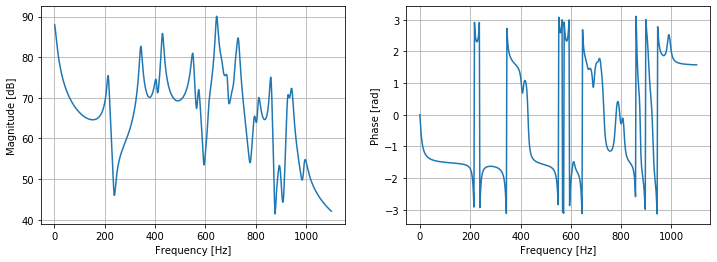

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(freqs, 20*np.log10(np.abs(spec)))
ax = plt.gca()
ax.set_ylabel("Magnitude [dB]")
ax.set_xlabel("Frequency [Hz]")
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(freqs, (np.angle(spec)))
plt.grid(True)
ax = plt.gca()
ax.set_ylabel("Phase [rad]")
ax.set_xlabel("Frequency [Hz]");

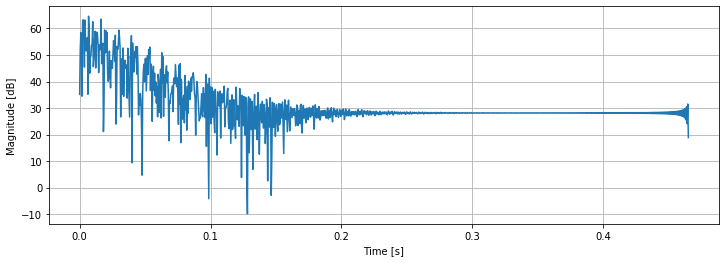

In [7]:
times = np.arange(0, n_samples)/samplingrate

plt.figure(figsize=(12, 4))
plt.plot(times, 20*np.log10(np.abs(rir)))
ax = plt.gca()
ax.set_ylabel("Magnitude [dB]")
ax.set_xlabel("Time [s]")
plt.grid(True)

In [8]:
np.save('../data/analytic_rtf_impedance.npy', spec)
np.save('../data/analytic_rir_impedance.npy', rir)

In [9]:
rir_rem, spec_rem, k_ns_rem = analytic.rectangular_room_impedance(
    L, r_S, r_R, zetas, f_max, samplingrate, c, n_samples, remove_cavity_mode=True)

C:\Users\berzborn\AppData\Local\Continuum\anaconda3\envs\roomacoustics\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\berzborn\AppData\Local\Continuum\anaconda3\envs\roomacoustics\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


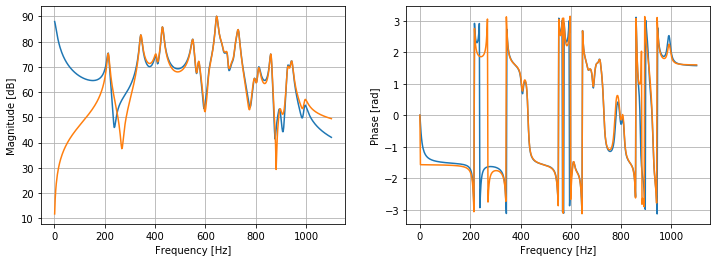

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(freqs, 20*np.log10(np.abs(spec)))
plt.plot(freqs, 20*np.log10(np.abs(spec_rem)))
ax = plt.gca()
ax.set_ylabel("Magnitude [dB]")
ax.set_xlabel("Frequency [Hz]")
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(freqs, (np.angle(spec)))
plt.plot(freqs, (np.angle(spec_rem)))
plt.grid(True)
ax = plt.gca()
ax.set_ylabel("Phase [rad]")
ax.set_xlabel("Frequency [Hz]");

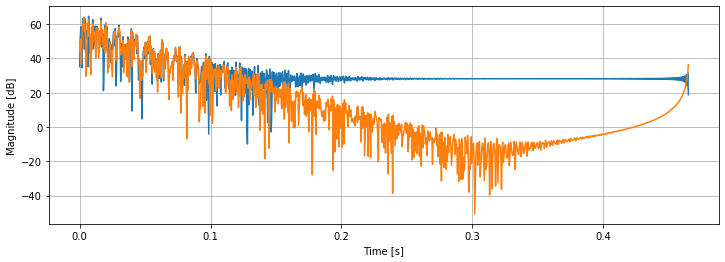

In [11]:
times = np.arange(0, n_samples)/samplingrate

plt.figure(figsize=(12, 4))
plt.plot(times, 20*np.log10(np.abs(rir)))
plt.plot(times, 20*np.log10(np.abs(rir_rem)))
ax = plt.gca()
ax.set_ylabel("Magnitude [dB]")
ax.set_xlabel("Time [s]")
plt.grid(True)

In [12]:
np.save('../data/analytic_rtf_impedance_no_cav.npy', spec_rem)
np.save('../data/analytic_rir_impedance_no_cav.npy', rir_rem)